In [1]:
# python peripherals
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

# numpy
import numpy

# ipython
from IPython.display import display, HTML

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# pytorch
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SequentialSampler
from torch.utils.data import DataLoader

# deep signature
from deep_signature.data_generation.curve_generation import LevelCurvesGenerator
from deep_signature.data_manipulation import curve_processing
from deep_signature.linalg import transformations

# utils
from utils import common as common_utils
from utils import evaluation as evaluation_utils
from utils import plot as plot_utils
from utils import settings

In [2]:
import warnings
warnings.filterwarnings("ignore")

# constants
true_arclength_colors = ['#FF8C00', '#444444']
predicted_arclength_colors = ['#AA0000', '#0000AA']
sample_colors = ['#FF0000', '#0000FF']
curve_colors = ['#FF0000', '#0000FF', '#FF9D11']
limit = 5
factor_extraction_limit = -1
comparison_curves_count = 2
sampling_ratio = 0.8
anchors_ratio = None
collection = 'rabbits'
transform_type = 'affine'
plots_dir_name=f'collections_signatures_{collection}'
plots_dir_name_forced=f'collections_signatures_{collection}_forced'

# randomness
numpy.random.seed(30)

# models
curvature_model, arclength_model = common_utils.load_models(transform_type=transform_type)

# curves
curves = numpy.load(file=os.path.normpath(f"C:/deep-signature-data/level-curves/curves/test_raw/affine/multimodality_25/{collection}@2x_1.npy"), allow_pickle=True)
# curves = curves[:limit]

# create color map
color_map = plt.get_cmap('rainbow', limit)

In [3]:
# # generate curve records
# curve_records = evaluation_utils.generate_curve_records(
#     arclength_model=arclength_model,
#     curvature_model=curvature_model,
#     curves=curves,
#     factor_extraction_curves=[],
#     transform_type=transform_type,
#     comparison_curves_count=comparison_curves_count,
#     sampling_ratio=sampling_ratio,
#     anchors_ratio=anchors_ratio,
#     neighborhood_supporting_points_count=settings.curvature_default_supporting_points_count,
#     section_supporting_points_count=settings.arclength_default_supporting_points_count,
#     do_not_downsample_first=True,
#     rotation=False)

In [4]:
# plot_utils.plot_curve_comparisons(
#     curve_records=curve_records, 
#     curve_colors=curve_colors,
#     sampling_ratio=sampling_ratio,
#     transformation_group_type=transform_type,
#     plot_to_screen=False,
#     normalize_signature=True,
#     plots_dir_name=plots_dir_name)

In [5]:
# curve_records_forced = evaluation_utils.generate_curve_records(
#     arclength_model=arclength_model,
#     curvature_model=curvature_model,
#     curves=curves,
#     factor_extraction_curves=[],
#     transform_type=transform_type,
#     comparison_curves_count=comparison_curves_count,
#     sampling_ratio=sampling_ratio,
#     anchors_ratio=anchors_ratio,
#     neighborhood_supporting_points_count=settings.curvature_default_supporting_points_count,
#     section_supporting_points_count=settings.arclength_default_supporting_points_count,
#     do_not_downsample_first=True,
#     rotation=False,
#     first_curve_index=1)

In [6]:
# plot_utils.plot_curve_comparisons(
#     curve_records=curve_records_forced, 
#     curve_colors=curve_colors,
#     sampling_ratio=sampling_ratio,
#     transformation_group_type=transform_type,
#     plot_to_screen=False,
#     normalize_signature=False,
#     plots_dir_name=plots_dir_name_forced)

6


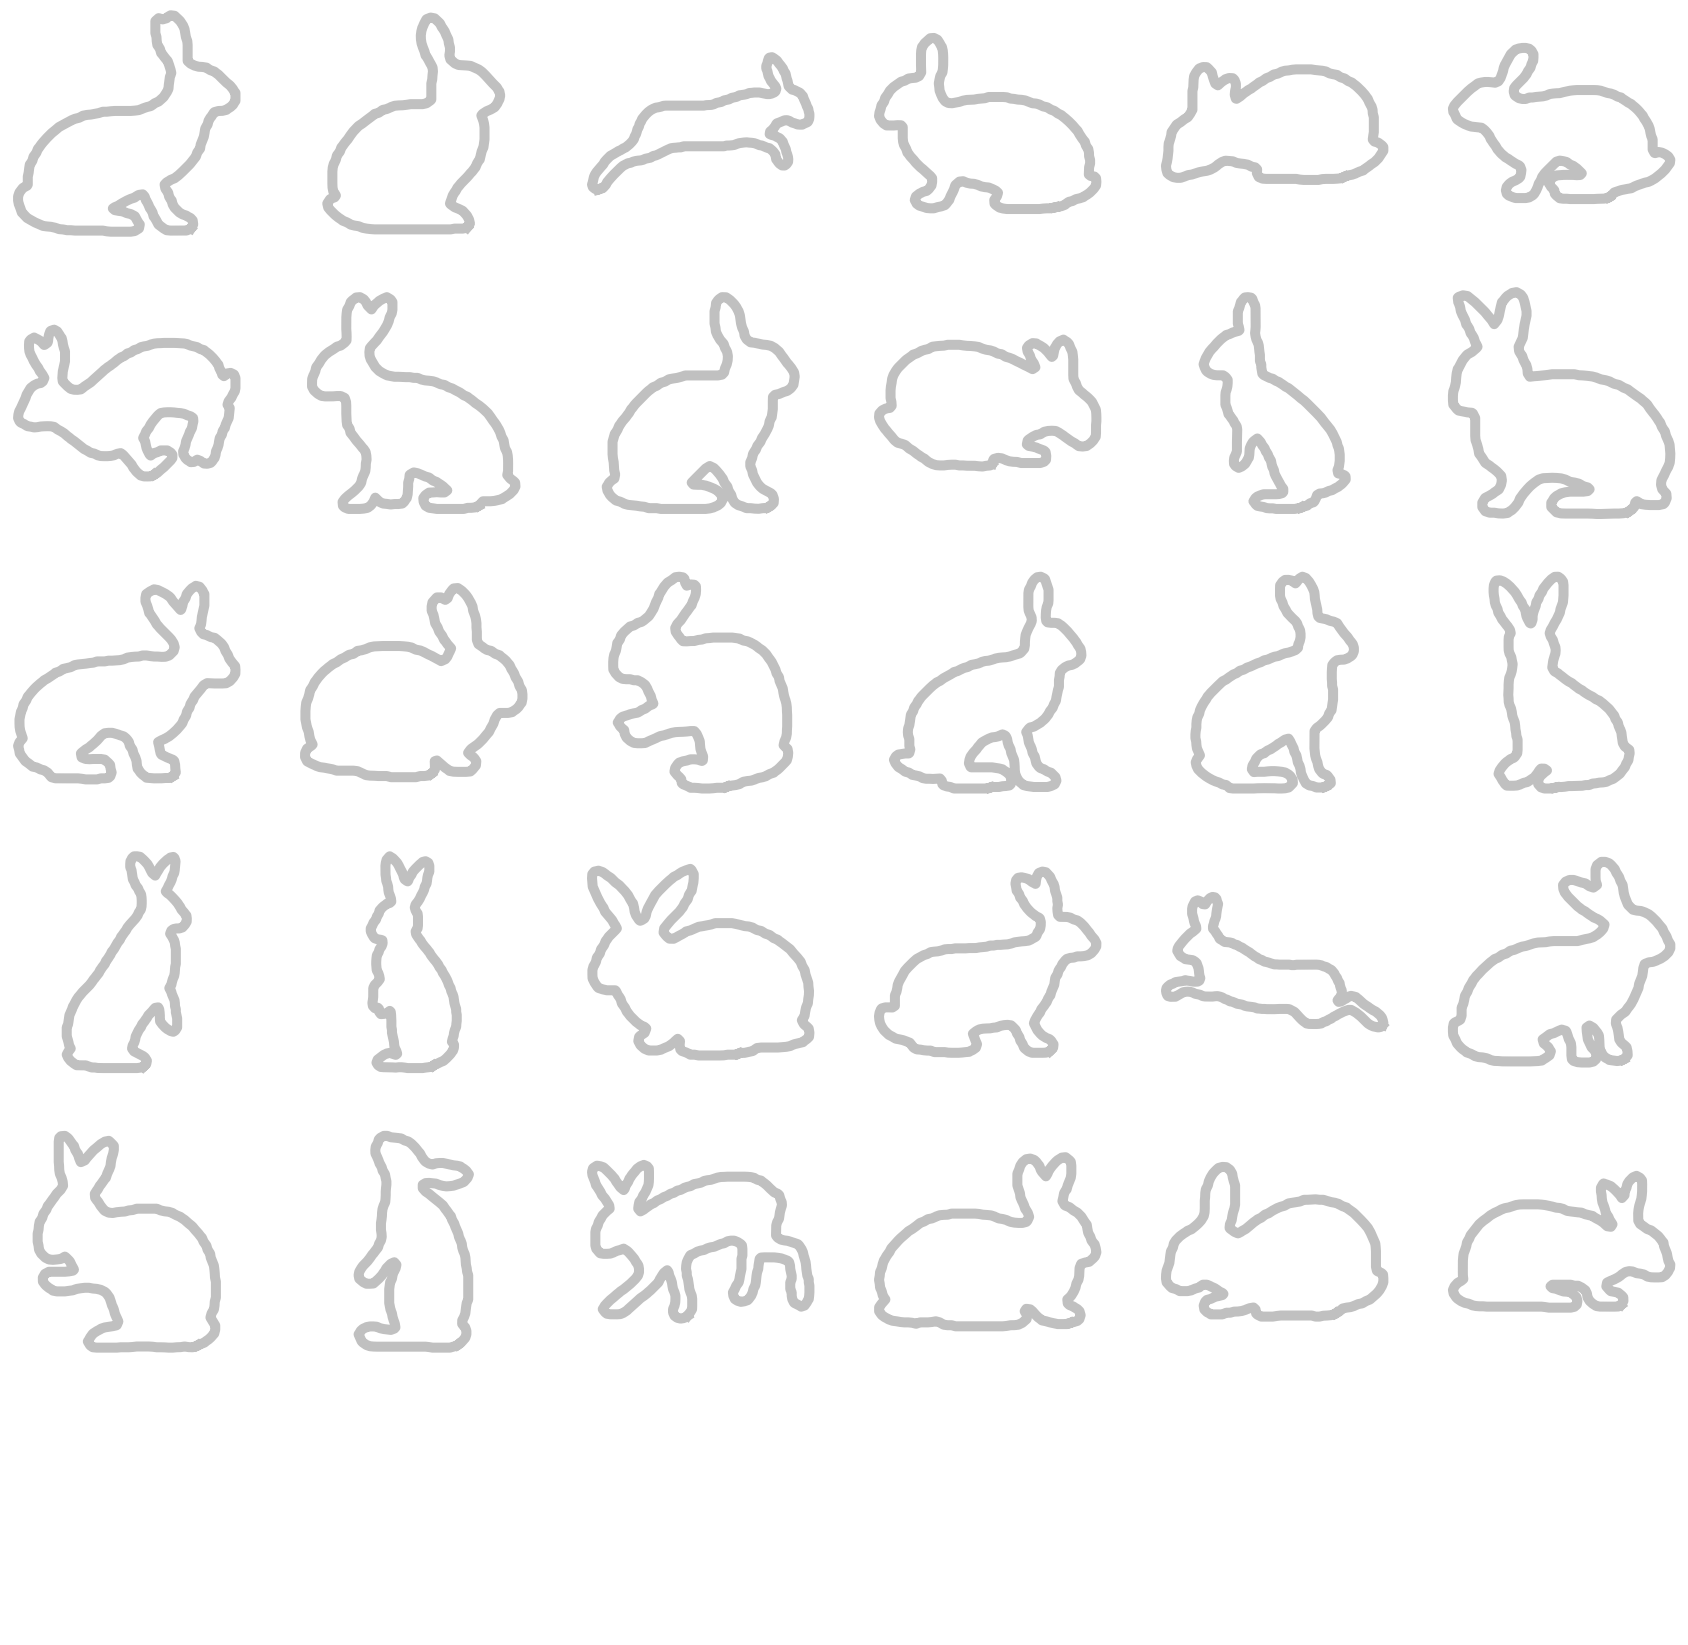

In [7]:
def plot_graph(ax, x, y, linewidth=2, color='red', alpha=1, zorder=1, label=None):
    return ax.plot(x, y, linewidth=linewidth, color=color, alpha=alpha, zorder=zorder, label=label)


def plot_curve(ax, curve, linewidth=2, color='red', alpha=1, zorder=1, label=None):
    x = curve[:, 0]
    y = curve[:, 1]
    return plot_graph(ax=ax, x=y, y=-x, linewidth=linewidth, color=color, alpha=alpha, zorder=zorder, label=label)
    # return plot_graph(ax=ax, x=x, y=y, linewidth=linewidth, color=color, alpha=alpha, zorder=zorder, label=label)

num_figs = int(numpy.floor(numpy.sqrt(curves.shape[0]))) + 1
print(num_figs)
fig, ax = plt.subplots(num_figs, num_figs, figsize=(30,30))

for curr_ax in ax.reshape(-1):
    curr_ax.axis('off')
    curr_ax.axis('equal')


for i, curve in enumerate(curves):
    curr_ax = ax[int(i / num_figs), int(i % num_figs)]
    plot_curve(ax=curr_ax, curve=curves[i], color='silver', linewidth=10)

plt.show()
fig.savefig(os.path.normpath(os.path.join(settings.plots_dir, f"./{plots_dir_name}_{sampling_ratio}_{transform_type}/{collection}.png")))